In [ ]:
# Import packages
from datetime import datetime
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import os
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import seaborn as sns

In [2]:
# Define directory to look at
data_dir = "./Data/"

# Let's have a look
os.listdir(data_dir)

['satisfaction.csv',
 '.DS_Store',
 'stops.csv',
 'train_3605.png',
 'tickets.csv',
 'stations.csv',
 'subscriptions.csv',
 'travelers_fixed.csv',
 'facilities.csv',
 'travelers.csv',
 'Trips',
 'Overview_NMBS_data.png',
 'incidents.csv']

In [3]:
# read in all the data
facilities = pd.read_csv('./Data/facilities.csv')
incidents = pd.read_csv('./Data/incidents.csv')
satisfaction = pd.read_csv('./Data/satisfaction.csv')
stations = pd.read_csv('./Data/stations.csv')
stops = pd.read_csv('./Data/stops.csv')
subscriptions = pd.read_csv('./Data/subscriptions.csv')
tickets = pd.read_csv('./Data/tickets.csv')
travelers = pd.read_csv('./Data/travelers.csv', sep=';')

# Questions 

*Understand how well stations are distributed across Belgium and identify underserved regions.*


### 1) Plot the number of stations per city, highlighting cities with multiple stations.

### 2) Is the number of stations per city proportional to its number of inhabitants? Plot and analyze the relationship 

### 3) Create a heat map showing the number of stations per province. Adjust for population to identify potential under-served areas. 

In [16]:
belgian_stations = stations[stations['country-code'] == 'be']
belgian_stations

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
3,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0
4,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0
5,8891140,Aalter,NaN,NaN,NaN,NaN,be,3.447848,51.092295,188.276119,240.0
6,8833209,Aarschot,NaN,NaN,NaN,NaN,be,4.824043,50.984406,171.664179,240.0
7,8892288,Aarsele,NaN,NaN,NaN,NaN,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...,...,...,...,...
670,8832334,Zonhoven,NaN,NaN,NaN,NaN,be,5.348815,50.989557,30.910448,300.0
671,8895208,Zottegem,NaN,NaN,NaN,NaN,be,3.814410,50.869102,161.223881,240.0
672,8891611,Zwankendamme,NaN,NaN,NaN,NaN,be,3.191557,51.306409,0.000000,NaN
673,8894821,Zwijndrecht,NaN,NaN,NaN,NaN,be,4.329780,51.214108,150.514925,300.0


In [15]:
merged_df = belgian_stations.merge(facilities[['zip', 'name']], on='name', how='left')
merged_df

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time,zip
0,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0,9300
1,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0,9300
2,8891140,Aalter,NaN,NaN,NaN,NaN,be,3.447848,51.092295,188.276119,240.0,9880
3,8833209,Aarschot,NaN,NaN,NaN,NaN,be,4.824043,50.984406,171.664179,240.0,3200
4,8892288,Aarsele,NaN,NaN,NaN,NaN,be,3.418363,50.984460,37.365672,300.0,8700
...,...,...,...,...,...,...,...,...,...,...,...,...
569,8832334,Zonhoven,NaN,NaN,NaN,NaN,be,5.348815,50.989557,30.910448,300.0,3520
570,8895208,Zottegem,NaN,NaN,NaN,NaN,be,3.814410,50.869102,161.223881,240.0,9620
571,8891611,Zwankendamme,NaN,NaN,NaN,NaN,be,3.191557,51.306409,0.000000,NaN,NaN
572,8894821,Zwijndrecht,NaN,NaN,NaN,NaN,be,4.329780,51.214108,150.514925,300.0,2070


In [18]:
def map_belgian_province(zipcode):
    try:
        zipcode = int(str(zipcode)[:4])  # ensure 4-digit number
    except:
        return None

    if 1000 <= zipcode <= 1299:
        return 'Brussel'
    elif 1300 <= zipcode <= 1499:
        return 'Waals Brabant'
    elif 1500 <= zipcode <= 1999:
        return 'Vlaams Brabant'
    elif 2000 <= zipcode <= 2999:
        return 'Antwerpen'
    elif 3000 <= zipcode <= 3499:
        return 'Vlaams Brabant'
    elif 3500 <= zipcode <= 3999:
        return 'Limburg'
    elif 4000 <= zipcode <= 4999:
        return 'Luik'
    elif 5000 <= zipcode <= 5680:
        return 'Namen'
    elif 5681 <= zipcode <= 6599:
        return 'Henegouwen'
    elif 6600 <= zipcode <= 6999:
        return 'Luxemburg'
    elif 7000 <= zipcode <= 7999:
        return 'Henegouwen'
    elif 8000 <= zipcode <= 8999:
        return 'West-Vlaanderen'
    elif 9000 <= zipcode <= 9999:
        return 'Oost-Vlaanderen'
    else:
        return None


In [20]:
merged_df['province'] = merged_df['zip'].apply(map_belgian_province)
province_counts = merged_df['province'].value_counts().reset_index()
province_counts.columns = ['province', 'station_count']
province_counts

,province,station_count
0,Henegouwen,92
1,Oost-Vlaanderen,82
2,Vlaams Brabant,65
3,Luik,63
4,Antwerpen,55
5,Namen,53
6,West-Vlaanderen,36
7,Brussel,34
8,Waals Brabant,28
9,Luxemburg,28


In [28]:
# load self created excel file regarding inhabitant data (source: statbel)
inh_df = pd.read_excel('./inhabitants_prov_2024.xlsx')

# show
inh_df.rename(columns={'Province': 'province'}, inplace=True)
inh_df


,province,Inhabitants
0,Antwerpen,1926522
1,Brussel,1249597
2,Limburg,900098
3,West-Vlaanderen,1226375
4,Vlaams Brabant,1196773
5,Oost-Vlaanderen,1572002
6,Waals Brabant,414130
7,Henegouwen,1360074
8,Luik,1119038
9,Luxemburg,295146


In [29]:
# read in file in geopandas data structure
provinces_df = gpd.read_file('./BELGIUM_-_Provinces/BELGIUM_-_Provinces.shp').to_crs(epsg=4326)
provinces_df.rename(columns={'NE_Name': 'province'}, inplace=True)

# show
provinces_df.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,province,geometry
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4..."
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ..."
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ..."
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ..."
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1..."


In [31]:
provinces_total = provinces_df.merge(province_counts, on='province', how='left')
provinces_total = provinces_total.merge(inh_df, on='province', how='left')
provinces_total['Inhabitants per Station'] = provinces_total['Inhabitants'] / provinces_total['station_count']
provinces_total.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,province,geometry,station_count,Inhabitants,Inhabitants per Station
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",55,1926522,35027.672727
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",34,1249597,36752.852941
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",65,1196773,18411.892308
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",28,414130,14790.357143
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",36,1226375,34065.972222


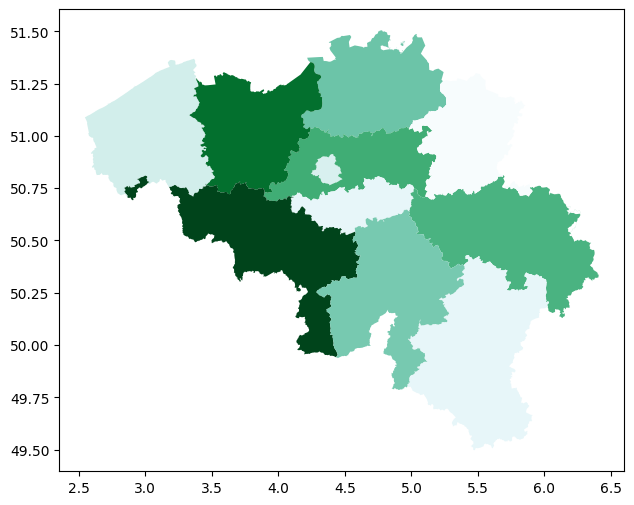

In [32]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# use cmap = 'BuGn' to get nice color-shaded plot
provinces_total.plot(column='station_count', cmap='BuGn', linewidth=0.8, ax=ax)
plt.show()

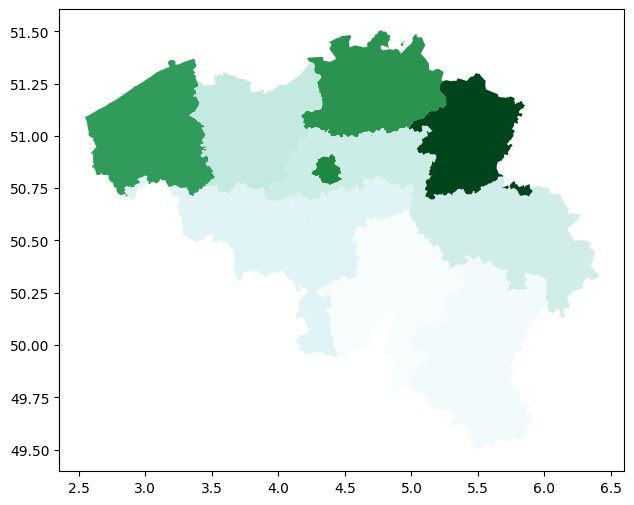

In [33]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# use cmap = 'BuGn' to get nice color-shaded plot
provinces_total.plot(column='Inhabitants per Station', cmap='BuGn', linewidth=0.8, ax=ax)
plt.show()

### 4) Which cities have poor access to train services? Consider metrics such as travel time or distance to the nearest station. Based on your analysis, would new routes be justified?